<a href="https://colab.research.google.com/github/wusinyee/MW-Portfolio/blob/main/sentiment_analysis_dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: **Sentiment Analysis Dataset Creation**

###**1. Setup and Installation**

In [1]:
# Install required packages
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import nltk
from wordcloud import WordCloud
from google.colab import drive

# Download NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Mount Google Drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Mounted at /content/drive


###**2. Dataset Creator And Processor**

In [3]:
class SentimentDataset:
    def __init__(self):
        self.data = None
        self.sia = SentimentIntensityAnalyzer()

    def create_sample_dataset(self):
        """Create sample dataset with predefined examples"""
        sample_texts = [
            "This product is absolutely amazing! Best purchase ever!",
            "Terrible experience, complete waste of money.",
            "Product arrived on time, works as expected.",
            "Good features but expensive for what you get.",
            "The customer service needs serious improvement.",
            "Love everything about this! Highly recommend!",
            "Not worth the price at all, very disappointed.",
            "It's okay, nothing special about it.",
            "Couldn't be happier with my purchase!",
            "Poor quality, broke after first use."
        ]

        self.data = pd.DataFrame({
            'text': sample_texts,
            'id': range(len(sample_texts))
        })
        return self.data

    def load_custom_data(self, file_path):
        """Load custom dataset from CSV"""
        try:
            self.data = pd.read_csv(file_path)
            print(f"Loaded {len(self.data)} samples from {file_path}")
        except:
            print("Error loading file. Creating sample dataset instead.")
            self.create_sample_dataset()
        return self.data

    def preprocess_text(self, text):
        """Clean and preprocess text"""
        # Convert to lowercase
        text = str(text).lower()
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Remove extra spaces
        return ' '.join(text.split())

### **3. Interactive Annotation Interface**

In [4]:
class SentimentAnnotator:
    def __init__(self, data):
        self.data = data.copy()
        self.data['sentiment'] = ''
        self.data['confidence'] = 0.0
        self.data['notes'] = ''
        self.data['timestamp'] = ''

    def annotate(self, batch_size=10):
        """Interactive annotation process"""
        print("\n=== Sentiment Annotation Interface ===")
        print("Labels: positive (p), negative (n), neutral (u)")
        print("Enter 'quit' to stop, 'skip' to skip current text\n")

        completed = 0
        for idx, row in self.data.iterrows():
            if completed >= batch_size:
                break

            if self.data.at[idx, 'sentiment'] != '':
                continue

            print(f"\nText {idx+1}/{len(self.data)}:")
            print(f"'{row['text']}'")

            # Get label
            label = input("Sentiment (p/n/u): ").lower()
            if label == 'quit':
                break
            if label == 'skip':
                continue

            if label in ['p', 'n', 'u']:
                sentiment = {'p': 'positive', 'n': 'negative', 'u': 'neutral'}[label]

                # Get confidence
                confidence = float(input("Confidence (0-1): "))
                notes = input("Notes (optional): ")

                # Save annotations
                self.data.at[idx, 'sentiment'] = sentiment
                self.data.at[idx, 'confidence'] = confidence
                self.data.at[idx, 'notes'] = notes
                self.data.at[idx, 'timestamp'] = datetime.now()

                completed += 1
            else:
                print("Invalid label! Use p, n, or u")

### **4. Analysis and Visualization**

In [5]:
class SentimentAnalyzer:
    def __init__(self, labeled_data):
        self.data = labeled_data

    def generate_stats(self):
        """Generate analysis statistics"""
        stats = {
            'Total Samples': len(self.data),
            'Labeled Samples': self.data['sentiment'].notna().sum(),
            'Distribution': self.data['sentiment'].value_counts().to_dict(),
            'Avg Confidence': round(self.data['confidence'].mean(), 2),
            'High Confidence': len(self.data[self.data['confidence'] > 0.8])
        }
        return stats

    def create_visualizations(self):
        """Generate visualization dashboard"""
        plt.style.use('seaborn')
        fig = plt.figure(figsize=(15, 10))

        # 1. Sentiment Distribution
        plt.subplot(2, 2, 1)
        sns.countplot(data=self.data, x='sentiment')
        plt.title('Sentiment Distribution')

        # 2. Confidence Histogram
        plt.subplot(2, 2, 2)
        sns.histplot(data=self.data, x='confidence', bins=10)
        plt.title('Confidence Distribution')

        # 3. Sentiment Over Time
        plt.subplot(2, 2, 3)
        self.data['timestamp'] = pd.to_datetime(self.data['timestamp'])
        time_sentiment = self.data.groupby([self.data['timestamp'].dt.date, 'sentiment']).size().unstack()
        time_sentiment.plot(kind='line', marker='o')
        plt.title('Sentiment Trends Over Time')

        plt.tight_layout()
        plt.show()

### **5. Export and Docmentation**

In [6]:
class DatasetExporter:
    @staticmethod
    def export_labeled_data(data, filename='labeled_dataset.csv'):
        """Export labeled dataset to Google Drive"""
        try:
            export_path = f'/content/drive/MyDrive/{filename}'
            data.to_csv(export_path, index=False)
            print(f"Dataset exported to: {export_path}")

            # Create README
            readme_content = f"""
            # Sentiment Analysis Dataset

            Created: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

            ## Statistics
            - Total Samples: {len(data)}
            - Labeled Samples: {data['sentiment'].notna().sum()}
            - Sentiment Distribution: {data['sentiment'].value_counts().to_dict()}

            ## Labels
            - positive: Clear positive sentiment
            - negative: Clear negative sentiment
            - neutral: No clear sentiment

            ## Files
            - {filename}: Main dataset file
            """

            with open('/content/drive/MyDrive/README.md', 'w') as f:
                f.write(readme_content)

        except Exception as e:
            print(f"Error exporting to Drive: {e}")
            data.to_csv(filename, index=False)

### **Use Case 1**

In [11]:
class SentimentAnalyzer:
    def __init__(self, labeled_data):
        self.data = labeled_data

    def generate_stats(self):
        """Generate analysis statistics"""
        stats = {
            'Total Samples': len(self.data),
            'Labeled Samples': self.data['sentiment'].notna().sum(),
            'Distribution': self.data['sentiment'].value_counts().to_dict(),
            'Avg Confidence': round(self.data['confidence'].mean(), 2),
            'High Confidence': len(self.data[self.data['confidence'] > 0.8])
        }
        return stats

    def create_visualizations(self):
        """Generate visualization dashboard"""
        # Set style safely
        plt.style.use('default')  # Using default style instead of seaborn

        # Create figure
        fig = plt.figure(figsize=(15, 10))

        # 1. Sentiment Distribution
        plt.subplot(2, 2, 1)
        if not self.data['sentiment'].empty:
            sns.countplot(data=self.data, x='sentiment')
            plt.title('Sentiment Distribution')

        # 2. Confidence Histogram
        plt.subplot(2, 2, 2)
        if not self.data['confidence'].empty:
            sns.histplot(data=self.data, x='confidence', bins=10)
            plt.title('Confidence Distribution')

        # 3. Sentiment Over Time
        plt.subplot(2, 2, 3)
        if not self.data['timestamp'].empty:
            self.data['timestamp'] = pd.to_datetime(self.data['timestamp'])
            time_sentiment = self.data.groupby(
                [self.data['timestamp'].dt.date, 'sentiment']
            ).size().unstack(fill_value=0)
            if not time_sentiment.empty:
                time_sentiment.plot(kind='line', marker='o')
                plt.title('Sentiment Trends Over Time')

        plt.tight_layout()
        plt.show()


Dataset Statistics:
Total Samples: 3
Labeled Samples: 3
Distribution: {'positive': 1, 'negative': 1, 'neutral': 1}
Avg Confidence: 0.77
High Confidence: 1


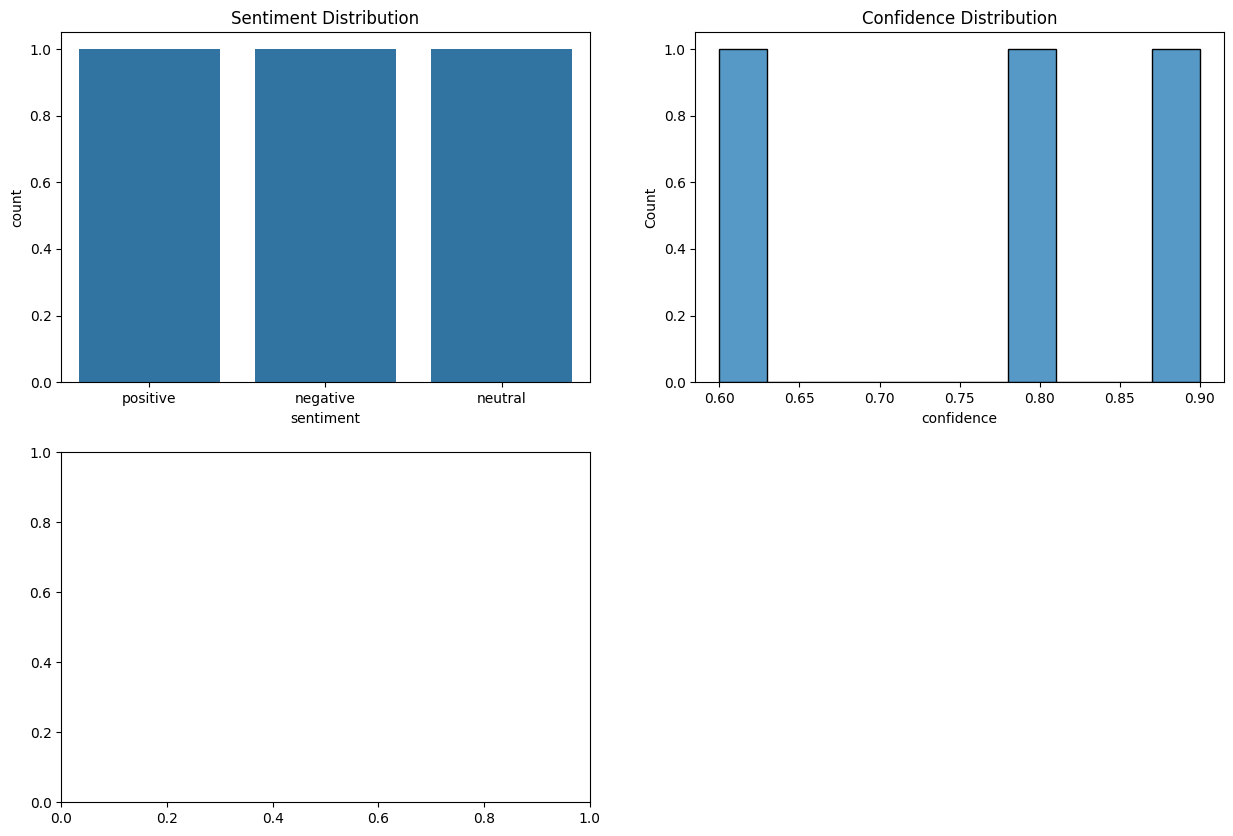

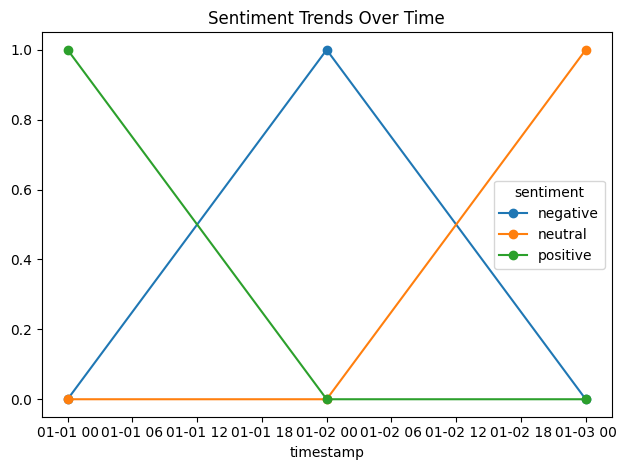

In [12]:
# Test the visualization
def test_visualization():
    # Create sample data
    sample_data = pd.DataFrame({
        'text': ['This is great!', 'This is terrible', 'This is okay'],
        'sentiment': ['positive', 'negative', 'neutral'],
        'confidence': [0.9, 0.8, 0.6],
        'timestamp': pd.date_range(start='2025-01-01', periods=3)
    })

    # Create analyzer and show results
    analyzer = SentimentAnalyzer(sample_data)

    # Print statistics
    print("\nDataset Statistics:")
    stats = analyzer.generate_stats()
    for key, value in stats.items():
        print(f"{key}: {value}")

    # Show visualizations
    analyzer.create_visualizations()

# Run the test
test_visualization()


Adding annotation for: This is great!

Current Statistics:
Total Samples: 1
Labeled Samples: 1
Distribution: {'positive': 1}
Avg Confidence: 0.9
High Confidence: 1


<ipython-input-13-75035b63a23e>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_row], ignore_index=True)


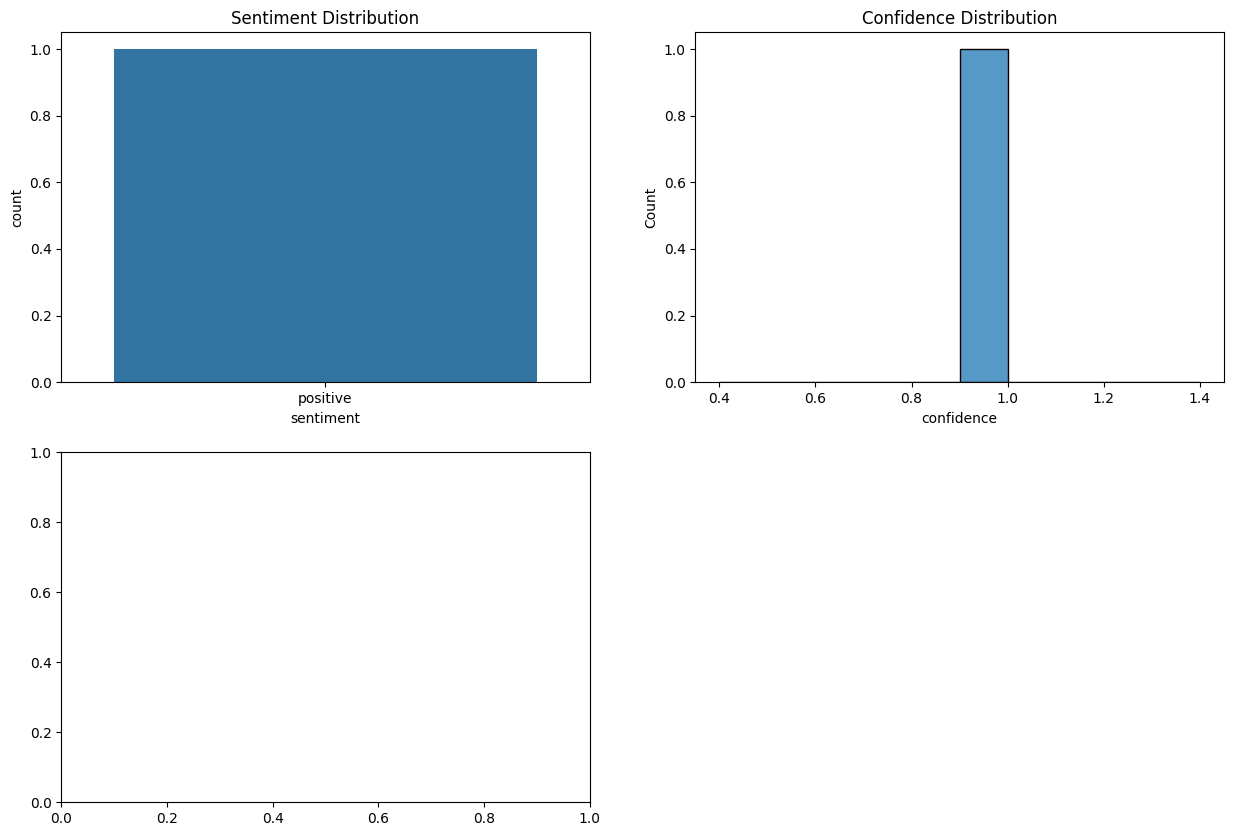

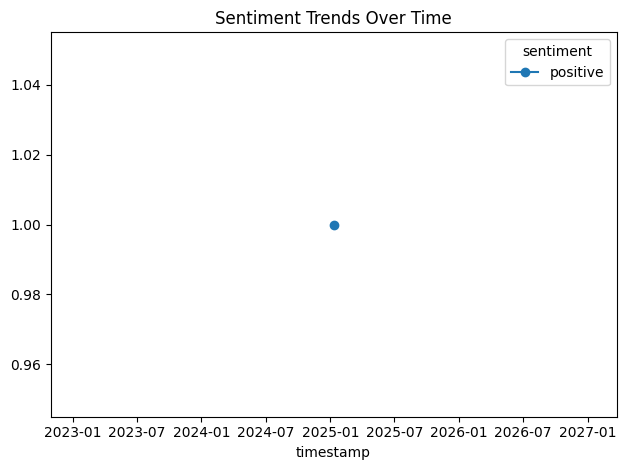


Adding annotation for: This is terrible

Current Statistics:
Total Samples: 2
Labeled Samples: 2
Distribution: {'positive': 1, 'negative': 1}
Avg Confidence: 0.85
High Confidence: 1


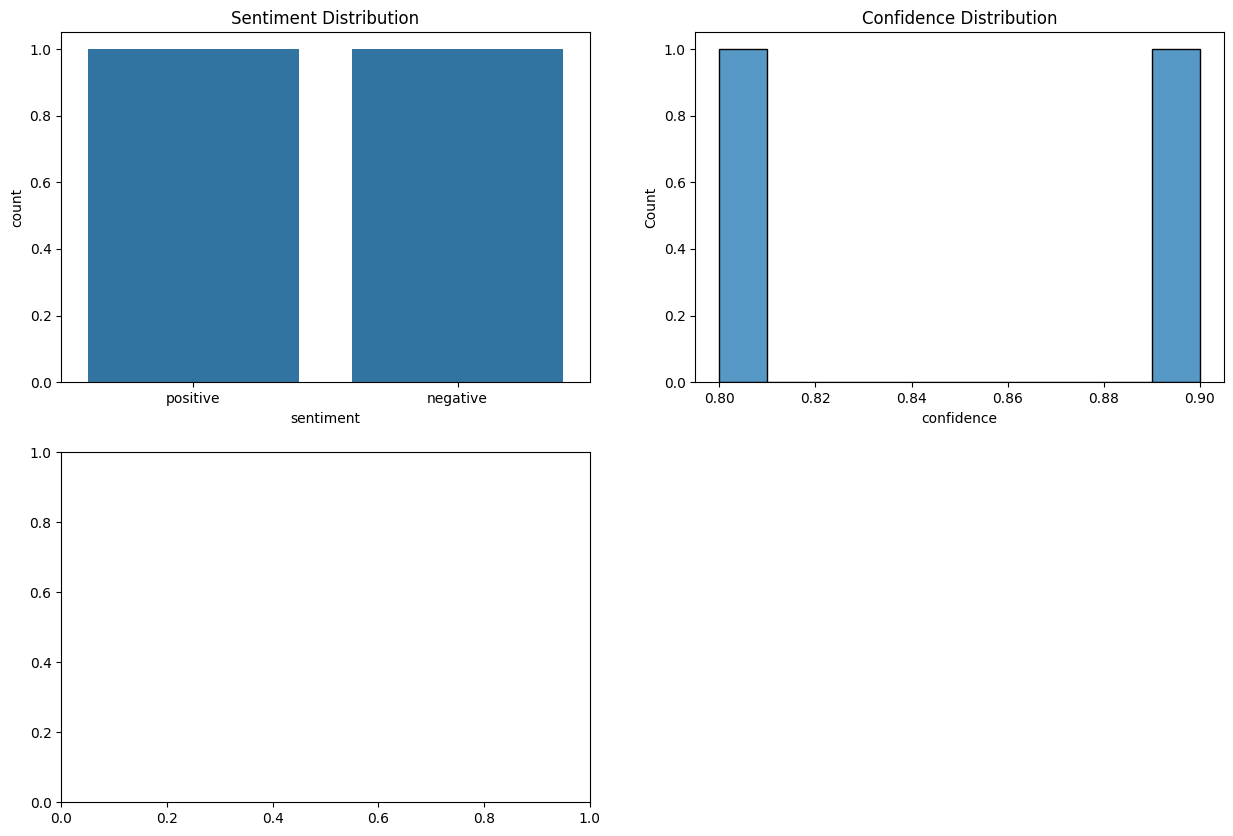

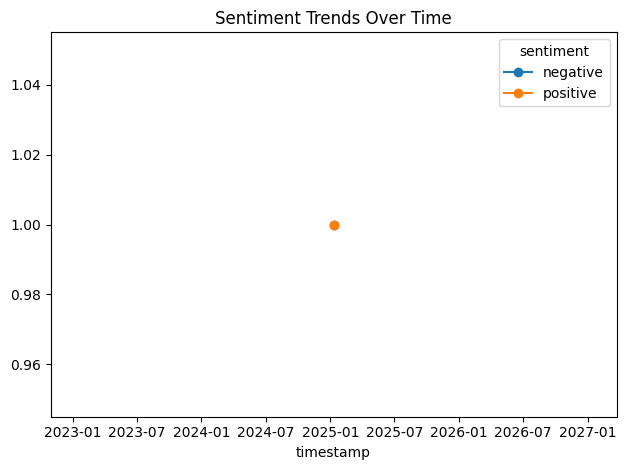


Adding annotation for: This is okay

Current Statistics:
Total Samples: 3
Labeled Samples: 3
Distribution: {'positive': 1, 'negative': 1, 'neutral': 1}
Avg Confidence: 0.8
High Confidence: 1


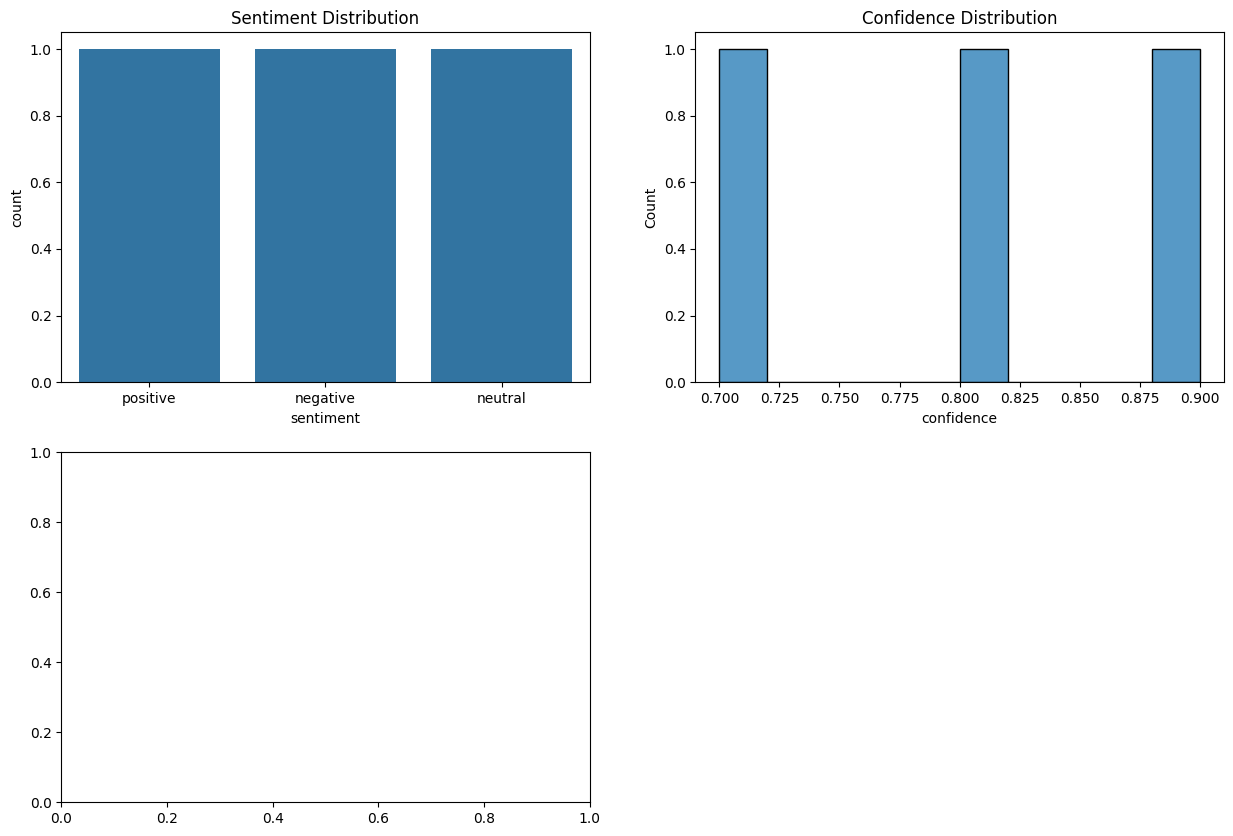

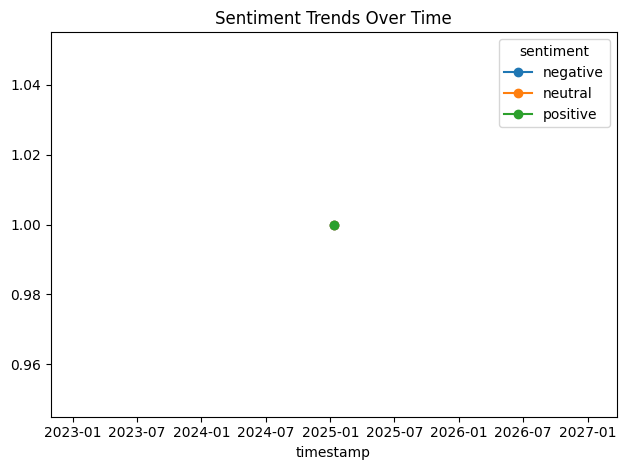

In [13]:
class InteractiveSentimentAnalyzer:
    def __init__(self):
        self.data = pd.DataFrame(columns=['text', 'sentiment', 'confidence', 'timestamp'])

    def add_annotation(self, text, sentiment, confidence):
        new_row = pd.DataFrame({
            'text': [text],
            'sentiment': [sentiment],
            'confidence': [confidence],
            'timestamp': [datetime.now()]
        })
        self.data = pd.concat([self.data, new_row], ignore_index=True)
        self.update_analysis()

    def update_analysis(self):
        # Create analyzer
        analyzer = SentimentAnalyzer(self.data)

        # Print current stats
        print("\nCurrent Statistics:")
        stats = analyzer.generate_stats()
        for key, value in stats.items():
            print(f"{key}: {value}")

        # Show updated visualizations
        analyzer.create_visualizations()

# Usage
analyzer = InteractiveSentimentAnalyzer()

# Add some annotations
texts = ["This is great!", "This is terrible", "This is okay"]
sentiments = ["positive", "negative", "neutral"]
confidences = [0.9, 0.8, 0.7]

for text, sentiment, confidence in zip(texts, sentiments, confidences):
    print(f"\nAdding annotation for: {text}")
    analyzer.add_annotation(text, sentiment, confidence)